# Classification with Neural Networks in TensorFlow
Courtesy: https://github.com/mrdbourke

## How a deep neural network learns

A model learns by updating and improving its weights and biases every epoch (when we call the `fit()` function).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called [**backpropagation**](https://en.wikipedia.org/wiki/Backpropagation).

In other words, data and labels pass through a model (**forward pass**) and it attempts to learn the relationship between the data and labels.

If this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (**backward pass**) and tweaking its weights and bias values to better represent the data.


## Import the Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

#to split the dataset
from sklearn.model_selection import train_test_split

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
import tensorflow as tf
print(tf.__version__)

2.16.1


## Import and Prep the data for Modelling

In [5]:
#read the dataset
df = pd.read_csv('C:\\Users\\Vasan\\#Data science python\\DS LEVEL 2\\DSFINAL PROJECT\\Deep learning with Tensorflow\\Dataset\\employee_attrition.csv')

In [6]:
#Separating target variable and other variables
Y= df.Attrition
X= df.drop(columns = ['Attrition'])

In [7]:
#Scaling the data
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [8]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=1,stratify=Y)

# Architecture of a classification neural network



| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |


[**Sequential API**](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) - The Sequential API is the simplest and most straightforward way to build neural networks in TensorFlow. It allows you to create models layer by layer, where each layer is added in sequence.

* When using the Sequential API in TensorFlow, you don't need to specify the input layer or the number of neurons in the input layer. The input layer is automatically created based on the shape of the input data.

In [9]:
# set a fixed random seed for the model's weight initialization
tf.keras.utils.set_random_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1) #output layer
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(x_train, y_train, epochs=5,verbose=0)
model_1.evaluate(x_train, y_train)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5592 - loss: 6.7914


[6.9903059005737305, 0.5514456033706665]

Looking at the accuracy metric, our model performs poorly (55% accuracy on a binary classification problem is almost guessing). What if we trained it for longer?

# Improving a model


To improve a model, few ways you can tune the model:

1. Add more layers
2. Increase the number of neurons
3. Change the optimization function
4. Change the activation functions
5. Fit on more data
6. Fit for more epochs
7. Change the Learning rate

> You can think of the **learning rate** as how quickly a model learns. The higher the learning rate, the faster the model's capacity to learn, however, when the learning rate is too high, the model tries to learn too fast and doesn't learn anything.



## Model with more epochs

In [10]:
# set a fixed random seed for the model's weight initialization
tf.keras.utils.set_random_seed(42)

# Train our model for longer (more chances to look at the data)
history = model_1.fit(x_train, y_train, epochs=100, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(x_train, y_train)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.5395 - loss: 7.3554


[7.252109050750732, 0.545918345451355]

We can keep increasing the number of epochs and test for accuracy.

## Model with extra layer

In [11]:
# add an extra layer.

# set a fixed random seed for the model's weight initialization
tf.keras.utils.set_random_seed(42)

# set model_1 to None
model_1 = None

# 1. Create the model (same as model_1 but with an extra layer)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) # output layer
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(x_train, y_train, epochs=50,verbose=0)
model_1.evaluate(x_train, y_train)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8216 - loss: 2.8755


[2.5972602367401123, 0.8388605713844299]

## Model with more Neurons

Let's add neurons in the hidden layer

In [12]:
# set a fixed random seed for the model's weight initialization
tf.keras.utils.set_random_seed(42)

# set model_1 to None
model_1 = None

# 1. Create the model (same as model_1 but with an extra layer)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(2),
  tf.keras.layers.Dense(1) # output layer
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(x_train, y_train, epochs=50,verbose=0)
model_1.evaluate(x_train, y_train)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.8216 - loss: 2.8755


[2.5972602367401123, 0.8388605713844299]

Adding more neurons to a hidden layer can sometimes decrease the accuracy of a model due to **overfitting**. Keep the neuron 1 and add new layer with 1 neuron.

In [13]:
# set a fixed random seed for the model's weight initialization
tf.keras.utils.set_random_seed(42)

# set model_1 to None
model_1 = None

# 1. Create the model (same as model_1 but with an extra layer)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1), # add another layer with 1 neuron
  tf.keras.layers.Dense(1) # output layer
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(x_train, y_train, epochs=50,verbose=0)
model_1.evaluate(x_train, y_train)




74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.8706 - loss: 0.4478


[0.39497196674346924, 0.8830782175064087]

The accuracy seems to be dropping. Revert back to the best model and try tuning the learning rate.

## Model with new Learning Rate
Read more about Learning Rate here: [Learning rate explained](https://medium.com/@swapnilin/learning-rate-hyperparameter-explained-2c1a619cbd33)

In [14]:
# The learning rate. Defaults to 0.001

# set a fixed random seed for the model's weight initialization
tf.keras.utils.set_random_seed(42)

# set model_1 to None
model_1 = None

# 1. Create the model (same as model_1 but with an extra layer)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) # output layer
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.0009),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(x_train, y_train, epochs=50,verbose=0)
model_1.evaluate(x_train, y_train)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.8383 - loss: 1.5987


[1.4985501766204834, 0.8435373902320862]

By lowering the learning rate a little, we improved the accuracy to 86%

## Finding the best learning rate

Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.

We changed the SGD optimizer's learning rate from the default of `0.001` to `0.0009`

To find the optimal learning rate we're going to use the following:

* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler) - You can think of a callback as an extra piece of functionality you can add to your model *while* its training.


> **Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work best with default values for most datasets.

In [15]:
# set a fixed random seed for the model's weight initialization
tf.keras.utils.set_random_seed(42)

# set model_1 to None
model_1 = None

# 1. Create the model (same as model_1 but with an extra layer)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_1.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Create a learning rate scheduler callback
# traverse a set of learning rate values starting from 1e-3, increasing by 10**(epoch/20) every epoch
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 0.001 * 0.9**(epoch/3)
)


# Fit the model (passing the lr_scheduler callback)
history = model_1.fit(x_train,
                      y_train,
                      epochs=100,
                      verbose=0,
                      callbacks=[lr_scheduler])


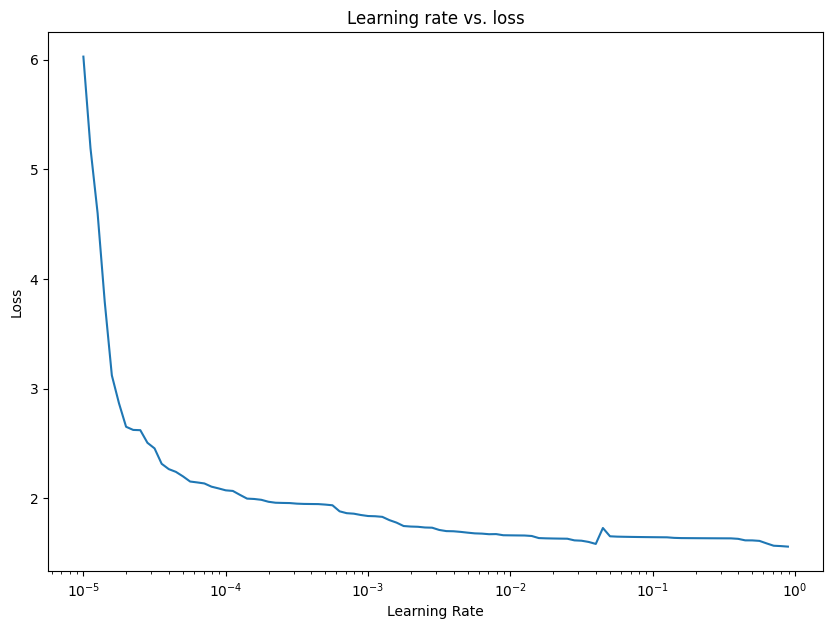

In [16]:

# Plot the learning rate versus the loss
lrs = 1e-5 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");
plt.show()

The ideal learning rate ends up somewhere near 0.001

## Activation Functions
Read more about Activation functions here : [Activation functions explained](https://medium.com/towards-data-science/using-activation-functions-in-neural-nets-c119ad80826)

In [17]:
# set a fixed random seed for the model's weight initialization
tf.keras.utils.set_random_seed(42)

# set model_1 to None
model_1 = None

# 1. Create the model (same as model_1 but with an extra layer)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # try activations LeakyReLU, sigmoid, Relu, tanh. Default is Linear
  tf.keras.layers.Dense(1, activation = 'sigmoid') # output layer
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.0009),
                metrics=['accuracy'])

# 3. Fit the model
history = model_1.fit(x_train, y_train, epochs=50,verbose=0)
model_1.evaluate(x_train, y_train)


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.8414 - loss: 0.3916


[0.3704763352870941, 0.8605442047119141]

In [18]:
# Predict on test set and view first 3 values
y_preds = model_1.predict(x_test)
y_preds[:3]

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.18190025],
       [0.3220027 ],
       [0.15062147]], dtype=float32)

It looks like we need to get our predictions into the binary format (0 or 1). Currently, they are prediction probabilities.

In [19]:
y_preds = tf.round(model_1.predict(x_test))
y_preds[:3]
#model_1.evaluate(y_test, y_preds)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.]], dtype=float32)>

In [20]:
# Evaluate the test predictions
accuracy_score(y_test, y_preds)

0.8503401360544217

## More classification evaluation methods

There are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |



# Plot the loss curves

Looking at the plots above, we can see the outputs of our model are very good.

But how did our model go whilst it was learning?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the **loss curves** (also referred to as the **learning curves**).

You might've seen we've been using the variable `history` when calling the `fit()` function on a model ([`fit()` returns a `History` object](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)).

This is where we'll get the information for how our model is performing as it learns.


Inspecting the outputs, we can see the loss values going down and the accuracy going up.

How's it look (visualize, visualize, visualize)?

Beautiful. This is the ideal plot we'd be looking for when dealing with a classification problem, loss going down, accuracy going up.

> **Note:** The loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

Text(0.5, 1.0, 'Model_1 training curves')

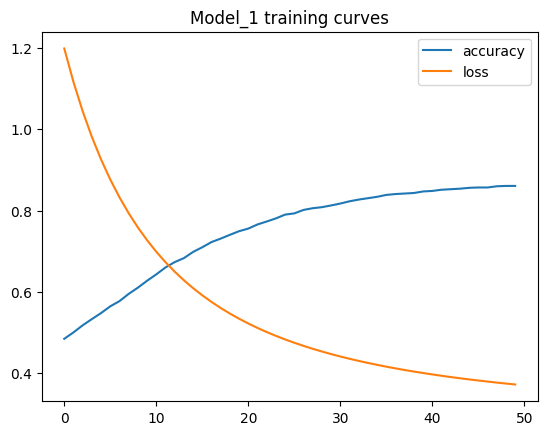

In [21]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_1 training curves")